**PROJETO DE SUPPORT VECTOR MACHINES USANDO O DATA SET DO SEABORN "IRIS"**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


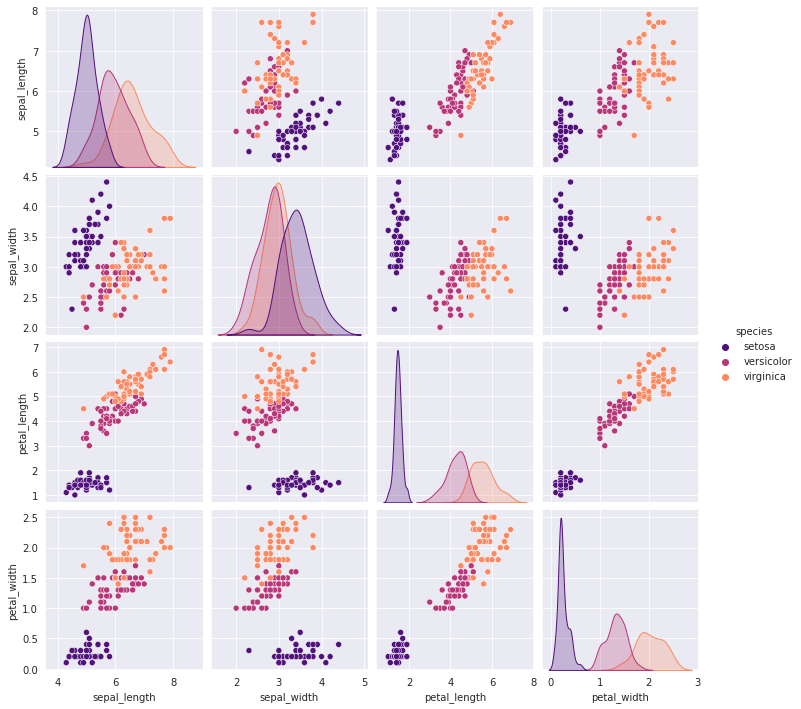

In [13]:
sns.set_style('darkgrid')
sns.pairplot(iris,hue='species', palette='magma')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


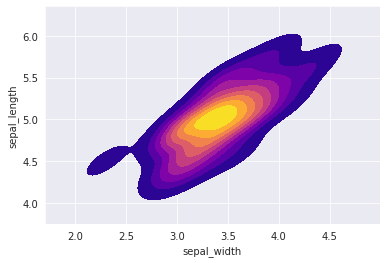

In [20]:
# KDE plot sepal_length vs sepal_width for setosa species of flowers
setosa = iris[iris['species']== 'setosa']
sns.kdeplot(setosa['sepal_width'], setosa['sepal_length'], cmap='plasma', shade=True, shade_lowest=False)

In [22]:
# Split em treino e teste
from sklearn.model_selection import train_test_split
X = iris.drop('species', axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Importando Support Vector Machines
from sklearn.svm import SVC
svc_model = SVC()

In [24]:
# Treinando o modelo
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
# Model evaluation
predictions = svc_model.predict(X_test)

In [26]:
# Import da Matriz confusão e report classificação
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(confusion_matrix(y_test, predictions))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [28]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [29]:
#Normalizando os paramentros 
from sklearn.model_selection import GridSearchCV

In [30]:
#  os parametros
param_grid = {'C':[1,10,100,1000], 'gamma':[1,0.1,0.001,0.0001]}

In [31]:
grid = GridSearchCV(SVC(), param_grid, verbose=2)

In [32]:
# Calculando os novos parâmetros
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [33]:
grid_predictions = grid.predict(X_test)

In [34]:
# Matriz de confusao do Grid teste
print(confusion_matrix(y_test, grid_predictions))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [35]:
# Report de classificação do grid teste
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

